In [191]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mastering-ordinal-regression-with-wine-data/sample_submission.csv
/kaggle/input/mastering-ordinal-regression-with-wine-data/train.csv
/kaggle/input/mastering-ordinal-regression-with-wine-data/test.csv


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense,Conv2D,LSTM,Flatten,MaxPooling2D,BatchNormalization,Bidirectional
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [193]:
data=pd.read_csv("/kaggle/input/mastering-ordinal-regression-with-wine-data/train.csv")
data.head(5)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.2,0.680,0.26,2.1,0.082,19.0,60.0,0.99650,3.34,0.72,10.8,5.0
1,1,11.2,0.350,0.42,2.1,0.075,18.0,28.0,0.99660,3.15,0.49,9.4,5.0
2,2,7.2,0.725,0.10,2.4,0.068,9.0,20.0,0.99604,3.19,0.58,9.8,6.0
3,3,8.7,0.735,0.15,2.4,0.093,12.0,21.0,0.99790,3.30,0.66,9.5,6.0
4,4,7.4,0.520,0.03,2.2,0.077,6.0,27.0,0.99627,3.35,0.56,9.2,5.0


In [194]:
data.columns

Index(['id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [195]:
data=data.drop("id",axis=1)
checker=data.describe()

In [196]:
checker.iloc[:,1]

variance={}

for i in range(len(checker)):
    column_name=checker.columns[i]
    newx_data=(checker.iloc[:,i]["std"]/checker.iloc[:,i]["mean"])*100
    variance[column_name]=newx_data

variance=pd.DataFrame.from_dict(variance,orient='index', columns=['Variance Percentage'])
variance

,Variance Percentage
fixed acidity,17.094884
volatile acidity,26.658925
citric acid,78.415424
residual sugar,23.041763
chlorides,17.787470
free sulfur dioxide,59.436095
total sulfur dioxide,64.554739
density,0.140128


In [197]:
scaler = StandardScaler()

data[["citric acid", "free sulfur dioxide","total sulfur dioxide"]] = scaler.fit_transform(data[["citric acid", "free sulfur dioxide","total sulfur dioxide"]])

In [198]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.336819,0.607755,0.086228,0.071119,-0.084380,-0.044836,0.229488,-0.417934,0.157154,0.023276,0.043736
volatile acidity,-0.336819,1.000000,-0.660715,-0.047834,-0.056206,-0.000034,0.004886,-0.100140,0.281078,-0.191828,-0.047120,-0.017364
citric acid,0.607755,-0.660715,1.000000,0.076739,0.085074,-0.019731,0.000693,0.184970,-0.465589,0.226753,0.058952,0.032623
residual sugar,0.086228,-0.047834,0.076739,1.000000,0.015964,0.005931,0.012799,0.071421,-0.043886,0.025190,0.067388,0.020549
chlorides,0.071119,-0.056206,0.085074,0.015964,1.000000,0.008614,0.015471,0.047834,-0.064583,0.021039,-0.026307,0.006896
free sulfur dioxide,-0.084380,-0.000034,-0.019731,0.005931,0.008614,1.000000,0.709463,0.007513,0.020907,-0.023489,-0.072740,-0.032341
total sulfur dioxide,-0.044836,0.004886,0.000693,0.012799,0.015471,0.709463,1.000000,0.050331,-0.006943,-0.028351,-0.181936,-0.100826
density,0.229488,-0.100140,0.184970,0.071421,0.047834,0.007513,0.050331,1.000000,-0.079482,0.053417,-0.097376,-0.041905
pH,-0.417934,0.281078,-0.465589,-0.043886,-0.064583,0.020907,-0.006943,-0.079482,1.000000,-0.113297,-0.004781,-0.027047
sulphates,0.157154,-0.191828,0.226753,0.025190,0.021039,-0.023489,-0.028351,0.053417,-0.113297,1.000000,0.072296,0.047568


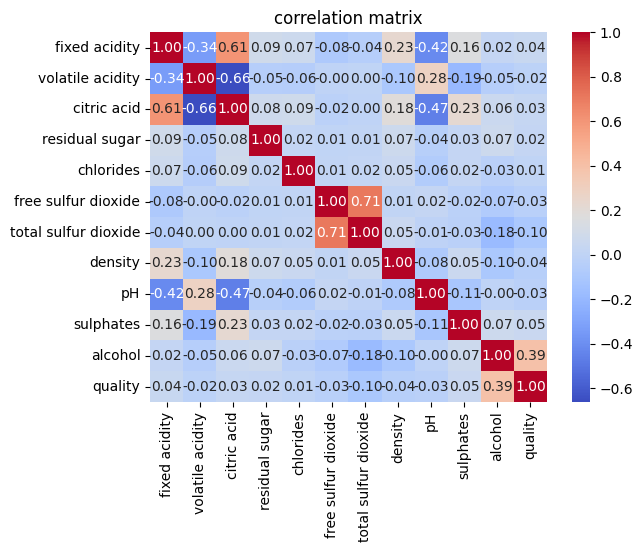

In [199]:
data_corr=data.corr()

sns.heatmap(data_corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation matrix")
plt.show
data_corr

In [202]:
y_data=data["quality"]
x_data=data.drop("quality",axis=1)

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)

In [204]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12000, 1)
(12000,)
(3000, 1)
(3000,)


In [205]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import cohen_kappa_score

model=lgb.LGBMRegressor(objective="regression")
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

y_pred=np.round(y_pred).astype(int)
y_pred=np.clip(y_pred,3,8)


error=mean_absolute_error(y_test,y_pred)
print(f'{error:.2f}')
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 1
[LightGBM] [Info] Start training from score 5.664833
0.53
Cohen's Kappa: 0.19422856375455777


In [156]:
def cnn_data(x_train,x_test):
    x_train = x_train.values.reshape(-1, 11, 1, 1).astype('float32')
    x_test = x_test.values.reshape(-1, 11, 1, 1).astype('float32')
    return x_train,x_test

In [157]:
def lstm_data(x_train,x_test):
    x_train = x_train.values.reshape(-1, 11, 1).astype('float32')
    x_test = x_test.values.reshape(-1, 11, 1).astype('float32')
    return x_train,x_test

In [158]:
x_train.shape

(12000, 11, 1)

In [159]:
def cnn_model():
    model = Sequential([
            Conv2D(128, (3,1), activation="relu", input_shape=(11,1,1)),
            MaxPooling2D((2,1)),
            Conv2D(64, (3,1), activation="relu"),
            MaxPooling2D((2,1)),
            Flatten(),
            Dense(64, activation="relu"),
            Dense(1, activation="linear")
        ])
    return model

In [160]:
model=Sequential([
    Bidirectional(LSTM(256,activation="relu",input_shape=(11,1),return_sequences=True)),
    BatchNormalization(),
    Bidirectional(LSTM(128,activation="relu",return_sequences=True)),
    Bidirectional(LSTM(64,activation="relu",return_sequences=True)),
    BatchNormalization(),
    Bidirectional(LSTM(32,activation="relu",return_sequences=False)),
    Flatten(),
    Dense(16,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1,activation="linear")  
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [150]:
model.compile(loss="mae",metrics=["mae"],optimizer="adam")

In [151]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 86ms/step - loss: 1.0466 - mae: 1.0466 - val_loss: 2.2602 - val_mae: 2.2602
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - loss: 0.6158 - mae: 0.6158 - val_loss: 0.6917 - val_mae: 0.6917
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - loss: 0.6108 - mae: 0.6108 - val_loss: 0.5874 - val_mae: 0.5874
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 84ms/step - loss: 0.6089 - mae: 0.6089 - val_loss: 0.5920 - val_mae: 0.5920
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - loss: 0.6038 - mae: 0.6038 - val_loss: 0.5995 - val_mae: 0.5995
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - loss: 0.6042 - mae: 0.6042 - val_loss: 0.6225 - val_mae: 0.6225
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - loss: 0.5996 - mae: 0.5996 - val_loss: 0.5876 - val_mae: 0.5876
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - loss: 0.5959 - mae: 0.5959 - val_loss: 0.6000 - val_mae: 0.6000
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━

NameError: name 'x_t' is not defined

In [54]:
y_train.shape

(12000,)